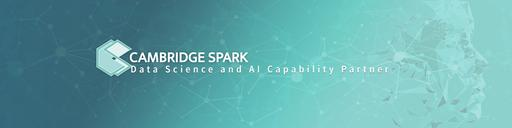

# Pandas Data Moderation and Cleaning

## Data Processing
### What is data processing?

> "... the collection and manipulation of data to produce new relevant information." 

*Source: [IT Pro](https://www.itpro.co.uk/business-operations/31681/what-is-data-processing)*

Arguably this could encompass elements throughout the **data lifecycle**, but here we are primarily concerned with:

- **Data cleaning**: dealing with *incomplete*, *incorrect*, or *inconsistent* values
- **Data aggregation**: *combining* data from several sources
- **Data transformation**: changing the *format* or *structure* of a dataset




## Data Preparation/Cleaning

Data  **pre-processing** or **cleaning** is often required to get our raw data into a more usable state:


- **Remove** missing values
- **Removal** of data not required for our task
- **Conversion** of values to an appropriate data type
- **Remove** incorrect values
- **Update** incorrect values
  - Removing invalid characters
  - Truncating part of a value
  - Adding an extra numeral or string-based data
- **Impute** missing or invalid data
  - Calculating the mean/median/mode of a column, sometimes within group subsets
  - Implementing model-based imputation (K-Nearest Neighbors, MICE, etc.)
- Backward **fill** or forward fill


##  `pandas` Tools for Data Cleaning

---

It is always important to check the data types of columns, the information contained must be represented properly. If datatypes or format do not fit, we can use the functionality below to adjust for that.

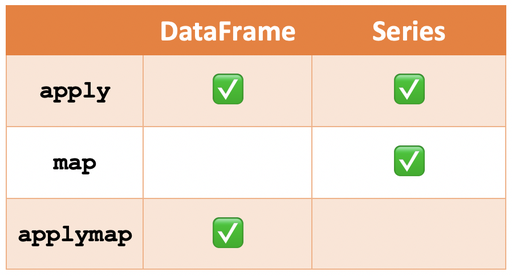

#### The `.map()` function

This built-in function can be used to apply a function to a pandas series or single dataframe colum.

#### The `.apply()` function

This function can be used to apply a function along every row or column of a dataframe, what is returned depends on if the function aggregates or not.

#### The `.applymap()` function

This function can be used to apply a function to every cell of a dataframe.

#### The `.fillna()` function

This built-in function allows to specify methods for filling missing data.


In [ ]:
import pandas as pd
import numpy as np

## Applying Functions to Series

* `df.map()` and `df.apply()` can both be used to apply a function to a pandas series or single dataframe colum.
* Only `df.apply()` allows the use of keywords
* `df.map()` allows replacing values through a dictionary

### Examples

In [ ]:
s_gbp = pd.Series(['1 GBP', '2 GBP', '3 GBP'])
s_gbp

In [ ]:
def remove_gbp(x):
    return float(x[:-4])

We can apply the function to a series with either `map` or `apply`.

In [ ]:
s_gbp.map(remove_gbp)

In [ ]:
s_gbp.apply(remove_gbp)

In [ ]:
s_mixed = pd.Series([1, 2, 3, 'a'])
s_mixed

In [ ]:
def convert_to_float(x):
    try: 
        return float(x)
    except:
        return np.nan

In [ ]:
s_mixed.apply(convert_to_float)

In [ ]:
s_mixed.map(convert_to_float)

If the function makes use of the keyword, we can pass this keyword directly only when using `apply`.

In [ ]:
def round_values(x, ndigits=2):
    return round(x, ndigits=ndigits)

In [ ]:
s_numbers = pd.Series([1.2345, 2.4578])
s_numbers

In [ ]:
s_numbers.apply(round_values)

In [ ]:
s_numbers.apply(round_values, ndigits=1)

With `map` we can use dictionary replacement. All keys will be replaced with the corresponding values if met in the series.

In [ ]:
s_letters = pd.Series(['a', 'b', 'a'])
s_letters

In [ ]:
s_letters.map({'a': 'b', 'b': 'a'})

## Applying Functions to DataFrames

* `df.apply()` can be used to apply a function along every row or column of a dataframe, what is returned depends on if the function aggregates or not.
* `df.applymap()` can be used to apply a function to every cell of a dataframe.

### Create another small DataFrame

In [ ]:
# Create some more test data.
np.random.seed(1)
df = pd.DataFrame(np.random.randn(5, 4), columns=['a', 'b', 'c', 'd'])
df

### Use the `.apply()`/`.applymap()` function to find the square root of all cells

In [ ]:
def square_root(x):
    if x>=0:
        return x**0.5
    else:
        return np.nan

In [ ]:
df.applymap(square_root)

We can use the numpy function instead.

In [ ]:
df.applymap(np.sqrt)

In this case we could also use `apply`.

In [ ]:
# Square root ALL CELLS (NaN == Not a Number).
df_sqrt = df.apply(np.sqrt)
df_sqrt

### Use `.apply()` to find the mean of the columns

In [ ]:
df.apply(np.mean, axis=0)

### Use `.apply()` to find the mean of the rows

In [ ]:
df.apply(np.mean, axis=1)

### Use `.applymap()` to round the value in each cell

In [ ]:
def round_values(x, ndigits=2):
    return round(x, ndigits=ndigits)

In [ ]:
df.apply(round_values, ndigits=3)

### Use `.applymap()` to apply a self-defined function to each cell

In [ ]:
def my_func(x):
    if x > 0:
        return 1
    else:
        return 0


df.applymap(my_func)

# Cleaning and Moderating a Dataset

### Data Preparation

Data  **pre-processing** or **cleaning** is often required to get our raw data into a more usable state:

- **Removal** of data not required for our task
- **Conversion** of values to an appropriate data type
- Checking for **missing values** and **fixing errors**

### Removal of superfluous data

We can use methods and syntax previously seen to reduce the number of rows and columns in our dataset.

In [ ]:
df_data = pd.read_csv('data/drugs.csv', index_col='NDC Number')
df_data.head(1)

In [ ]:
cols_to_drop = ['Date Introduced to Market', 'Acquisition Date', \
                'Acquisition Price','Marketing/Pricing Plan Description',\
                'Acquisition Price Comment', 'General Comments', \
                'Supporting Documents']

df_cols = df_data.drop(cols_to_drop, axis=1)
df_cols.head(1)

- The DataFrame `.drop()` method allows us to drop any columns (`axis=1`) which are not required

In [ ]:
df_cols

In [ ]:
df_sub = df_cols[df_cols['Manufacturer Name']!='Kyowa Kirin, Inc.'].copy()
display(df_cols.shape)
df_sub.shape

- We can remove rows which have particular values in a given column
- Using `.copy()` ensures that `df_sub` is a distinct object in memory and that subsequent changes to it will not affect the original DataFrame

## Making data more usable  

We may encounter datasets where particular states or values are represented in a way which are **not suitable or optimal for analysis** using our chosen tools (such as pandas and Python), for example:

- Boolean values are **represented differently** (`Yes` | `No` or `1` | `0`)
- Percentages have **inconsistent formatting** (`0.42` or `42%`)
- Ambiguous dates have been **misinterpreted** (`dd-mm-yy` or `mm-dd-yy`)

The `Indicator` columns contain values which are either `1.0` or `NaN`; replace the `NaN` values with zeros to help with our analysis:

In [ ]:
df_sub.columns

In [ ]:
# convert the Indicator 0 values as ints
indicator_columns = df_sub.columns[df_sub.columns.str.contains("Indicator")]
df_sub[indicator_columns] = df_sub[indicator_columns].fillna(0).astype(int)
df_sub.head(2)

- We used the `.columns` attribute to access the column labels, and the `.contains()` method on the string (`.str`) of each one to identify those which contain `'Indicator'`
- The `.fillna()` method replaced the `NaN` values with zeros in the identified `indicator_columns`
- `.astype(int)` makes our DataFrame more readable and less ambiguous 

We also notice that in the `Estimated Number of Patients` column we see both `NaN` values and `0.0` values:

In [ ]:
display(df_sub['Estimated Number of Patients'].isna().sum())
df_sub[df_sub['Estimated Number of Patients'] == 0].shape[0]

We determine that the `0.0` values should in fact be `NaN` values, because we assume they must be missing (rather than there being an expectation at `Estimated Number of Patients` will actually be zero):

In [ ]:
df_sub['Estimated Number of Patients'] = df_sub['Estimated Number of Patients'].replace(0, np.nan)
df_clean = df_sub.copy()
df_clean.head(3)

- We used the `.replace()` method to replace zeros with `NaN` values, which can be created using `np.nan`
    - `np` is the alias we used when importing `numpy` earlier
    - the `.nan` attribute defines `NaN` values
- We assigned a copy of the cleaned DataFrame to `df_clean`

#### Using the pandas `.apply()` method

The `.apply()` method allows us to **apply our own functions** to our data

- Typically this is used to create a new column or update an existing one with the results of calling the function with an existing column of values

In [ ]:
from dataframes import dimensions
dimensions

We'd like to have the dimensions in metres rather than centimetres. Here's a function we can apply:

In [ ]:
def cm_to_m(cm):    
    return cm / 100

In [ ]:
dimensions[['length (m)', 'width (m)']] = dimensions[['length (cm)', 'width (cm)']].apply(cm_to_m)
dimensions

- We have applied the function to two columns, assigning the results to two new columns

We can also use `.apply()` using multiple values from a given row of a DataFrame:

In [ ]:
def area(row):
    return row['length (m)'] * row['width (m)']

In [ ]:
dimensions['area (m2)'] = dimensions.apply(area, axis=1)
dimensions

- Notice that here the function relies on those columns being present in the DataFrame
- `axis=1` is requred to do this in a column-wise manner

In our drugs example, we notice that we have several instances where multiple entries in `Drug Product Description` refer to the same drug, but wiith differing dosage levels. We create a function which returns only the first word: 

In [ ]:
def first_word(description):
    return description.split(' ')[0] if ' ' in description else description

- This function has a single parameter `description` and needs to be called with a string
- The `.split()` method will split the string wherever there is a space (`' '`) and then the first element (`[0]`) in the resulting list will be accessed
    - In the absence of a space,`description` will be returned

In [ ]:
df_clean['Short Description'] = df_clean['Drug Product Description'].apply(first_word)

- We then used the `.apply()` method to apply our `first_word` function to `Drug Product Description`, creating the new column `Short Description`

#### Using the `.nunique()` method

The `.nunique()` method allows us to identify the **number of unique values** in a Series:

In [ ]:
df_clean['Drug Product Description'].nunique()

In [ ]:
df_clean['Short Description'].nunique()

In the example, we can see that our new `Short Description` column has less than half the number of unique values.

## Filling missing values

---

When we took the square root of all the elements in df, some values where not mapped to another number because they were negative. One could use `.applymap()` in some way to fill these values. A more direct method uses pandas' data filling methods.

### Fill all missing values with 'neg' (indicating that the missing value was due to a negative original value)

In [ ]:
df_sqrt

In [ ]:
df_sqrt.fillna('neg')

### We could do that also for one column only. 

Note that the given dataframe was not modified before. We have to specify `inplace=True` to do so.

In [ ]:
df_sqrt.fillna({'b': 'neg'}, inplace=True)

### In other contexts, it might be useful to fill with other values. 

Just to show how it works,
let's fill the missing value in column `c`with the column mean.

In [ ]:
df_sqrt.c

In [ ]:
df_sqrt.c.mean()

In [ ]:
df_sqrt.c.fillna(df_sqrt.c.mean(), inplace=True)
df_sqrt

### Forward filling propagates values from rows above

In [ ]:
df_sqrt.a.fillna(method='ffill', inplace=True)
df_sqrt

In [ ]:
df_sqrt.d.fillna(method='ffill', inplace=False)

### Backward filling propagates values from rows below

In [ ]:
df_sqrt.d.fillna(method='bfill', inplace=True)
df_sqrt

## Jupyter Exercise

Data preparation and cleaning

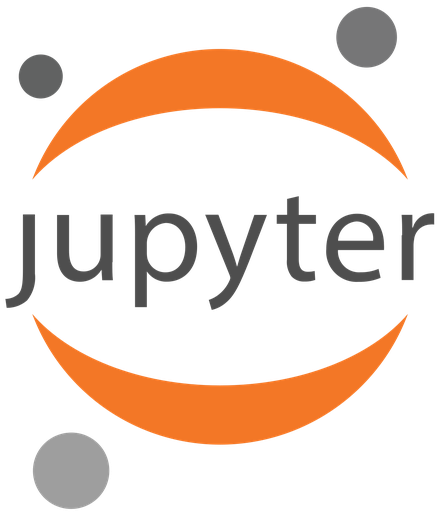

Open `cleaning-with-pandas-workbook-solution.ipynb`